# AIN311 COURSE PROJECT


## Feature  Desription :
url :https://data.scorenetwork.org/hockey/nhl-shots.html

| Variable                | Description                                                                                                     |
|-------------------------|-----------------------------------------------------------------------------------------------------------------|
| `game_id`               | Unique integer identifier for game shot took place in                                                          |
| `description`           | String detailed description of shot event                                                                      |
| `shot_outcome`          | String denoting the outcome of the shot, either BLOCKED_SHOT (meaning blocked by a non-goalie), GOAL, MISSED_SHOT (shot that missed the net), or SHOT (shot on net that was saved by a goalie) |
| `period`                | Integer value of the game period                                                                               |
| `period_seconds_remaining` | Numeric value of the seconds remaining in the period                                                       |
| `game_seconds_remaining`   | Numeric value of the seconds remaining in the game; negative for overtime periods                         |
| `home_score`            | Integer value of the home team score after the event                                                           |
| `away_score`            | Integer value of the away team score after the event                                                           |
| `home_name`             | String name of the home team                                                                                   |
| `away_name`             | String name of the away team                                                                                   |
| `event_team`            | String defining the team taking the shot                                                                      |
| `event_goalie_name`     | String name of goalie (if in net)                                                                             |
| `empty_net`             | Boolean indicating if the shot was during an empty net situation, TRUE if so but FALSE or NA if not           |
| `event_player_1_name`   | String name of the primary event player                                                                       |
| `event_player_1_type`   | String indicator for the role of event_player_1 (typically the shooter)                                       |
| `event_player_2_name`   | String name of the secondary event player                                                                     |
| `event_player_2_type`   | String indicator for the role of event_player_2 (blocker, assist, or goalie)                                  |
| `strength_code`         | String indicator for game strength: EV (Even), SH (Shorthanded), or PP (Power Play)                           |
| `x_fixed`               | Numeric transformed x-coordinate of event in feet, where the home team always shoots to the right, away team to the left |
| `y_fixed`               | Numeric transformed y-coordinate of event in feet, where the home team always shoots to the right, away team to the left |
| `shot_distance`         | Numeric distance (in feet) to center of net for unblocked shot events                                         |
| `shot_angle`            | Numeric angle (in degrees) to center of net for unblocked shot events                                          |


## 1. Data Preprocessing


###  1.1. Explaratory Data Analysis


In [2]:
#import  libraries
import os 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt



In [14]:
#load data and display
df = pd.read_csv('shots.csv')
df.head()

,game_id,description,shot_outcome,period,period_seconds_remaining,game_seconds_remaining,home_score,away_score,home_name,away_name,...,empty_net,event_player_1_name,event_player_1_type,event_player_2_name,event_player_2_type,strength_code,x_fixed,y_fixed,shot_distance,shot_angle
0,2021020001,Steven Stamkos Wrist Shot saved by Tristan Jarry,SHOT,1,1137,3537,0,0,Tampa Bay Lightning,Pittsburgh Penguins,...,NaN,Steven.Stamkos,Shooter,Tristan.Jarry,Goalie,EV,61.0,-32.0,42.5,48.8
1,2021020001,Zach Bogosian shot blocked shot by Brock McGinn,BLOCKED_SHOT,1,1115,3515,0,0,Tampa Bay Lightning,Pittsburgh Penguins,...,NaN,Zach.Bogosian,Shooter,Brock.McGinn,Blocker,EV,60.0,-17.0,NaN,NaN
2,2021020001,Brock McGinn Wrist Shot saved by Andrei Vasile...,SHOT,1,1096,3496,0,0,Tampa Bay Lightning,Pittsburgh Penguins,...,NaN,Brock.McGinn,Shooter,Andrei.Vasilevskiy,Goalie,EV,-65.0,19.0,30.6,38.4
3,2021020001,Jan Rutta Wrist Shot saved by Tristan Jarry,SHOT,1,1079,3479,0,0,Tampa Bay Lightning,Pittsburgh Penguins,...,NaN,Jan.Rutta,Shooter,Tristan.Jarry,Goalie,EV,-8.0,-27.0,100.7,15.6
4,2021020001,Danton Heinen Wrist Shot saved by Andrei Vasil...,SHOT,1,1033,3433,0,0,Tampa Bay Lightning,Pittsburgh Penguins,...,NaN,Danton.Heinen,Shooter,Andrei.Vasilevskiy,Goalie,EV,-60.0,-4.0,29.3,7.9


In [15]:
# summary about entries and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160573 entries, 0 to 160572
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   game_id                   160573 non-null  int64  
 1   description               160573 non-null  object 
 2   shot_outcome              160573 non-null  object 
 3   period                    160573 non-null  int64  
 4   period_seconds_remaining  160573 non-null  int64  
 5   game_seconds_remaining    160573 non-null  int64  
 6   home_score                160573 non-null  int64  
 7   away_score                160573 non-null  int64  
 8   home_name                 160573 non-null  object 
 9   away_name                 160573 non-null  object 
 10  event_team                160573 non-null  object 
 11  event_goalie_name         89064 non-null   object 
 12  empty_net                 8712 non-null    object 
 13  event_player_1_name       160573 non-null  o

In [5]:
len(df['game_id'].unique())

1401

I initially considered dropping the `game_id` feature due to its small unique count. However, since many shots are specific to individual games, `game_id` might provide valuable context for game-specific patterns and could be useful in later analyses.

In [16]:
# Check for empty rows
empty_rows = df.isna().all(axis=1)
df[empty_rows]


,game_id,description,shot_outcome,period,period_seconds_remaining,game_seconds_remaining,home_score,away_score,home_name,away_name,...,empty_net,event_player_1_name,event_player_1_type,event_player_2_name,event_player_2_type,strength_code,x_fixed,y_fixed,shot_distance,shot_angle


No empty rows detected.

In [17]:
#check duplicates
df[df.duplicated]

,game_id,description,shot_outcome,period,period_seconds_remaining,game_seconds_remaining,home_score,away_score,home_name,away_name,...,empty_net,event_player_1_name,event_player_1_type,event_player_2_name,event_player_2_type,strength_code,x_fixed,y_fixed,shot_distance,shot_angle
139212,2021021223,Ben Chiarot Backhand saved by Ilya Sorokin,SHOT,2,742,1942,1,0,New York Islanders,Florida Panthers,...,NaN,Ben.Chiarot,Shooter,Ilya.Sorokin,Goalie,EV,-85.0,-6.0,7.2,56.3


In [18]:
#remove duplicates
df.drop_duplicates(inplace=True) 

In [19]:
#check missing values
df.isnull().sum()

game_id                          0
description                      0
shot_outcome                     0
period                           0
period_seconds_remaining         0
game_seconds_remaining           0
home_score                       0
away_score                       0
home_name                        0
away_name                        0
event_team                       0
event_goalie_name            71509
empty_net                   151860
event_player_1_name              0
event_player_1_type              0
event_player_2_name            374
event_player_2_type            374
strength_code                  306
x_fixed                         13
y_fixed                         13
shot_distance                38224
shot_angle                   38224
dtype: int64

## Handling missing values

In [20]:
df['empty_net'].value_counts()

empty_net
False    8195
True      517
Name: count, dtype: int64

In [21]:
# Fill NaN values with boolean False, then infer objects to avoid warnings
df['empty_net'] = df['empty_net'].fillna(False)
df['empty_net'] = df['empty_net'].infer_objects()
df['empty_net'] = df['empty_net'].astype(bool)

C:\Users\NURŞAH SATILMIŞ\AppData\Local\Temp\ipykernel_18272\1553471446.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['empty_net'] = df['empty_net'].fillna(False)


In [22]:
df['empty_net'].value_counts()

empty_net
False    160055
True        517
Name: count, dtype: int64

In [23]:
df['empty_net'].isnull().sum()

0

`event_goalie_name`    : String name of goalie/ goalkeeper (if in net) 
it related to empthy_net features , we should ınvestigate both

In [24]:
# Look at the values
df['event_goalie_name'].isnull().sum()

71509

In [25]:
# filter the part of 'event_goalie name' is missing
temp = df[df['event_goalie_name'].isnull()] 
temp['empty_net'].value_counts()

empty_net
False    70992
True       517
Name: count, dtype: int64

Out of 71,526 instances, 517 missing `event_goalie_name` values indicate situations where there was actually nobody in the net. We can impute these values with 'nobody' to signify an empty net scenario. However, the reason for the remaining missing values is unknown."

In [ ]:
# Fill missing 'event_goalie_name' values with 'nobody' where 'empty_net' is True 
df.loc[(df['event_goalie_name'].isnull()) & (df['empty_net'] == True), 'event_goalie_name'] = 'nobody'


In [28]:
df['event_goalie_name'].isnull().sum()

70992

517 of missing values was handled.

In [ ]:
# Impute missing values with "not goal"
df['event_goalie_name'] = df['event_goalie_name'].fillna("not goal")
df['event_goalie_name'].isnull().sum()

0

`event_player_2_name`

In [ ]:
df[df['event_player_2_name'].isnull()]


,game_id,description,shot_outcome,period,period_seconds_remaining,game_seconds_remaining,home_score,away_score,home_name,away_name,...,empty_net,event_player_1_name,event_player_1_type,event_player_2_name,event_player_2_type,strength_code,x_fixed,y_fixed,shot_distance,shot_angle
108,2021020001,"Bryan Rust (1) Wrist Shot, assists: none",GOAL,3,109,109,2,6,Tampa Bay Lightning,Pittsburgh Penguins,...,True,Bryan.Rust,Scorer,NaN,NaN,SH,24.0,10.0,113.4,5.1
229,2021020002,Max Pacioretty Wide of Net,MISSED_SHOT,3,72,72,4,3,Vegas Golden Knights,Seattle Kraken,...,False,Max.Pacioretty,Shooter,NaN,NaN,SH,22.0,-28.0,72.6,22.7
1794,2021020015,Hampus Lindholm Wide of Net,MISSED_SHOT,3,275,275,4,1,Anaheim Ducks,Winnipeg Jets,...,False,Hampus.Lindholm,Shooter,NaN,NaN,SH,-79.0,30.0,170.7,10.1
2144,2021020018,Bo Horvat Wide of Net,MISSED_SHOT,3,94,94,3,4,Philadelphia Flyers,Vancouver Canucks,...,False,Bo.Horvat,Shooter,NaN,NaN,SH,31.0,-20.0,121.7,9.5
2609,2021020022,John Tavares Goalpost,MISSED_SHOT,3,24,24,3,1,Toronto Maple Leafs,Ottawa Senators,...,False,John.Tavares,Shooter,NaN,NaN,SH,61.0,-37.0,46.4,52.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158206,2021030242,Zach Hyman Wide of Net,MISSED_SHOT,3,11,11,3,5,Calgary Flames,Edmonton Oilers,...,False,Zach.Hyman,Shooter,NaN,NaN,SH,48.0,-40.0,142.7,16.3
159075,2021030314,Ondrej Palat Wide of Net,MISSED_SHOT,3,108,108,3,1,Tampa Bay Lightning,New York Rangers,...,False,Ondrej.Palat,Shooter,NaN,NaN,SH,25.0,23.0,68.0,19.8
159081,2021030314,"Ondrej Palat (7) Wrist Shot, assists: none",GOAL,3,9,9,4,1,Tampa Bay Lightning,New York Rangers,...,True,Ondrej.Palat,Scorer,NaN,NaN,SH,48.0,22.0,46.5,28.2
159441,2021030321,"Gabriel Landeskog (7) Wrist Shot, assists: none",GOAL,3,22,22,8,6,Colorado Avalanche,Edmonton Oilers,...,True,Gabriel.Landeskog,Scorer,NaN,NaN,SH,42.0,31.0,56.3,33.4


`shot_distance`

In [ ]:
df[df['shot_distance'].isnull()]

,game_id,description,shot_outcome,period,period_seconds_remaining,game_seconds_remaining,home_score,away_score,home_name,away_name,...,empty_net,event_player_1_name,event_player_1_type,event_player_2_name,event_player_2_type,strength_code,x_fixed,y_fixed,shot_distance,shot_angle
1,2021020001,Zach Bogosian shot blocked shot by Brock McGinn,BLOCKED_SHOT,1,1115,3515,0,0,Tampa Bay Lightning,Pittsburgh Penguins,...,False,Zach.Bogosian,Shooter,Brock.McGinn,Blocker,EV,60.0,-17.0,NaN,NaN
6,2021020001,Erik Cernak shot blocked shot by Danton Heinen,BLOCKED_SHOT,1,1009,3409,0,0,Tampa Bay Lightning,Pittsburgh Penguins,...,False,Erik.Cernak,Shooter,Danton.Heinen,Blocker,EV,52.0,-21.0,NaN,NaN
7,2021020001,Evan Rodrigues shot blocked shot by Ryan McDonagh,BLOCKED_SHOT,1,987,3387,0,0,Tampa Bay Lightning,Pittsburgh Penguins,...,False,Evan.Rodrigues,Shooter,Ryan.McDonagh,Blocker,EV,-71.0,11.0,NaN,NaN
11,2021020001,Jan Rutta shot blocked shot by Mark Friedman,BLOCKED_SHOT,1,882,3282,0,0,Tampa Bay Lightning,Pittsburgh Penguins,...,False,Jan.Rutta,Shooter,Mark.Friedman,Blocker,EV,76.0,-1.0,NaN,NaN
14,2021020001,Kris Letang shot blocked shot by Ross Colton,BLOCKED_SHOT,1,847,3247,0,0,Tampa Bay Lightning,Pittsburgh Penguins,...,False,Kris.Letang,Shooter,Ross.Colton,Blocker,EV,-76.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160565,2021030416,Erik Johnson shot blocked shot by Steven Stamkos,BLOCKED_SHOT,3,224,224,1,2,Tampa Bay Lightning,Colorado Avalanche,...,False,Erik.Johnson,Shooter,Steven.Stamkos,Blocker,EV,-74.0,2.0,NaN,NaN
160567,2021030416,Bowen Byram shot blocked shot by Anthony Cirelli,BLOCKED_SHOT,3,150,150,1,2,Tampa Bay Lightning,Colorado Avalanche,...,False,Bowen.Byram,Shooter,Anthony.Cirelli,Blocker,EV,-65.0,-6.0,NaN,NaN
160568,2021030416,Mikhail Sergachev shot blocked shot by Erik Jo...,BLOCKED_SHOT,3,138,138,1,2,Tampa Bay Lightning,Colorado Avalanche,...,False,Mikhail.Sergachev,Shooter,Erik.Johnson,Blocker,EV,76.0,2.0,NaN,NaN
160569,2021030416,Nikita Kucherov shot blocked shot by Gabriel L...,BLOCKED_SHOT,3,101,101,1,2,Tampa Bay Lightning,Colorado Avalanche,...,False,Nikita.Kucherov,Shooter,Gabriel.Landeskog,Blocker,PP,74.0,-5.0,NaN,NaN


In [ ]:
temp =df[df['shot_distance'].isnull()]
temp['shot_outcome'].info()

<class 'pandas.core.series.Series'>
Index: 38224 entries, 1 to 160572
Series name: shot_outcome
Non-Null Count  Dtype 
--------------  ----- 
38224 non-null  object
dtypes: object(1)
memory usage: 597.2+ KB


<AxesSubplot: >

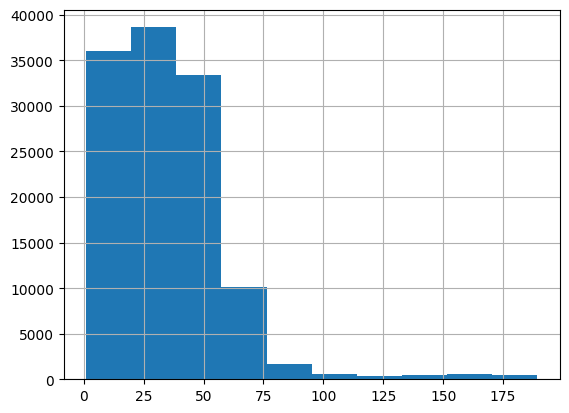

In [ ]:
df['shot_distance'].hist()

The output shows that when a shot is blocked, the 'shot_distance' becomes null. We can replace the null values with '-1'. Since the shot distance starts from zero, this substitution should not cause any issues.



In [ ]:
df['shot_distance']= df['shot_distance'].fillna(-1)
df['shot_distance'].isnull().sum()

0

`shot_angle`

In [ ]:
df['shot_angle'].info()

<class 'pandas.core.series.Series'>
Index: 160572 entries, 0 to 160572
Series name: shot_angle
Non-Null Count   Dtype  
--------------   -----  
122348 non-null  float64
dtypes: float64(1)
memory usage: 2.5 MB


In [ ]:
df[df['shot_angle'].isnull()]

,game_id,description,shot_outcome,period,period_seconds_remaining,game_seconds_remaining,home_score,away_score,home_name,away_name,...,empty_net,event_player_1_name,event_player_1_type,event_player_2_name,event_player_2_type,strength_code,x_fixed,y_fixed,shot_distance,shot_angle
1,2021020001,Zach Bogosian shot blocked shot by Brock McGinn,BLOCKED_SHOT,1,1115,3515,0,0,Tampa Bay Lightning,Pittsburgh Penguins,...,False,Zach.Bogosian,Shooter,Brock.McGinn,Blocker,EV,60.0,-17.0,-1.0,NaN
6,2021020001,Erik Cernak shot blocked shot by Danton Heinen,BLOCKED_SHOT,1,1009,3409,0,0,Tampa Bay Lightning,Pittsburgh Penguins,...,False,Erik.Cernak,Shooter,Danton.Heinen,Blocker,EV,52.0,-21.0,-1.0,NaN
7,2021020001,Evan Rodrigues shot blocked shot by Ryan McDonagh,BLOCKED_SHOT,1,987,3387,0,0,Tampa Bay Lightning,Pittsburgh Penguins,...,False,Evan.Rodrigues,Shooter,Ryan.McDonagh,Blocker,EV,-71.0,11.0,-1.0,NaN
11,2021020001,Jan Rutta shot blocked shot by Mark Friedman,BLOCKED_SHOT,1,882,3282,0,0,Tampa Bay Lightning,Pittsburgh Penguins,...,False,Jan.Rutta,Shooter,Mark.Friedman,Blocker,EV,76.0,-1.0,-1.0,NaN
14,2021020001,Kris Letang shot blocked shot by Ross Colton,BLOCKED_SHOT,1,847,3247,0,0,Tampa Bay Lightning,Pittsburgh Penguins,...,False,Kris.Letang,Shooter,Ross.Colton,Blocker,EV,-76.0,1.0,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160565,2021030416,Erik Johnson shot blocked shot by Steven Stamkos,BLOCKED_SHOT,3,224,224,1,2,Tampa Bay Lightning,Colorado Avalanche,...,False,Erik.Johnson,Shooter,Steven.Stamkos,Blocker,EV,-74.0,2.0,-1.0,NaN
160567,2021030416,Bowen Byram shot blocked shot by Anthony Cirelli,BLOCKED_SHOT,3,150,150,1,2,Tampa Bay Lightning,Colorado Avalanche,...,False,Bowen.Byram,Shooter,Anthony.Cirelli,Blocker,EV,-65.0,-6.0,-1.0,NaN
160568,2021030416,Mikhail Sergachev shot blocked shot by Erik Jo...,BLOCKED_SHOT,3,138,138,1,2,Tampa Bay Lightning,Colorado Avalanche,...,False,Mikhail.Sergachev,Shooter,Erik.Johnson,Blocker,EV,76.0,2.0,-1.0,NaN
160569,2021030416,Nikita Kucherov shot blocked shot by Gabriel L...,BLOCKED_SHOT,3,101,101,1,2,Tampa Bay Lightning,Colorado Avalanche,...,False,Nikita.Kucherov,Shooter,Gabriel.Landeskog,Blocker,PP,74.0,-5.0,-1.0,NaN


In [ ]:
temp= df['shot_outcome'][df['event_player_2_name'].notna()]
temp.value_counts()


shot_outcome
SHOT            80647
BLOCKED_SHOT    38224
MISSED_SHOT     32485
GOAL             8842
Name: count, dtype: int64

<AxesSubplot: >

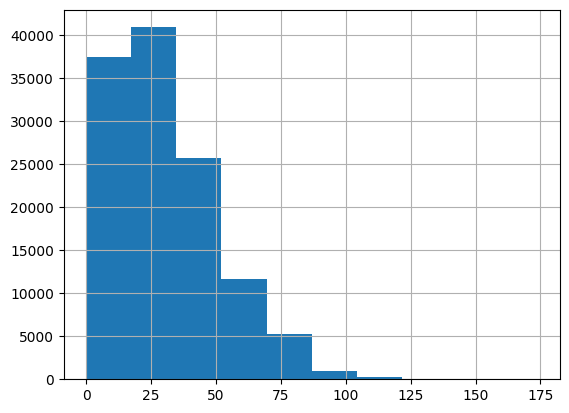

In [ ]:
df['shot_angle'].hist()

Shot angle doesn't exist for blocked shot. We can fill it by "-1" to put a mark

In [ ]:
df['shot_angle']= df['shot_angle'].fillna(-1)
df['shot_angle'].isnull().sum()

0

## Data Visualization

In [ ]:
# summarize the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160572 entries, 0 to 160572
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   game_id                   160572 non-null  int64  
 1   description               160572 non-null  object 
 2   shot_outcome              160572 non-null  object 
 3   period                    160572 non-null  int64  
 4   period_seconds_remaining  160572 non-null  int64  
 5   game_seconds_remaining    160572 non-null  int64  
 6   home_score                160572 non-null  int64  
 7   away_score                160572 non-null  int64  
 8   home_name                 160572 non-null  object 
 9   away_name                 160572 non-null  object 
 10  event_team                160572 non-null  object 
 11  event_goalie_name         160572 non-null  object 
 12  empty_net                 160572 non-null  bool   
 13  event_player_1_name       160572 non-null  object

In [ ]:
numerical_features =['period','period_seconds_remaining','game_seconds_remaining','home_score','away_score','x_fixed','y_fixed','shot_distance','shot_angle']
categorical_features = df.columns.difference(numerical_features).tolist()


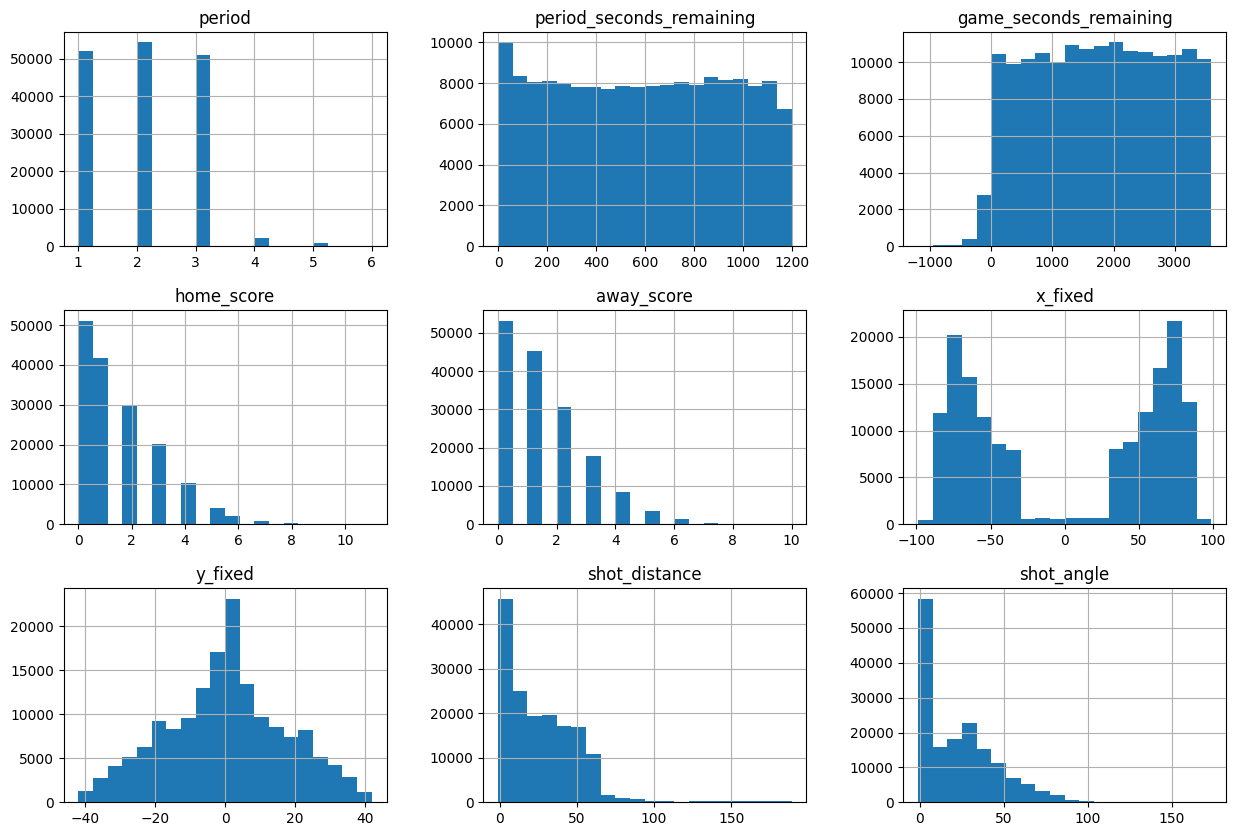

Text(0.5, 0.98, 'Histograms of Features')

<Figure size 640x480 with 0 Axes>

In [ ]:
#Histograms for numerical features
df[numerical_features].hist(bins=20, figsize=(15, 10))
plt.show()
plt.suptitle("Histograms of Features")


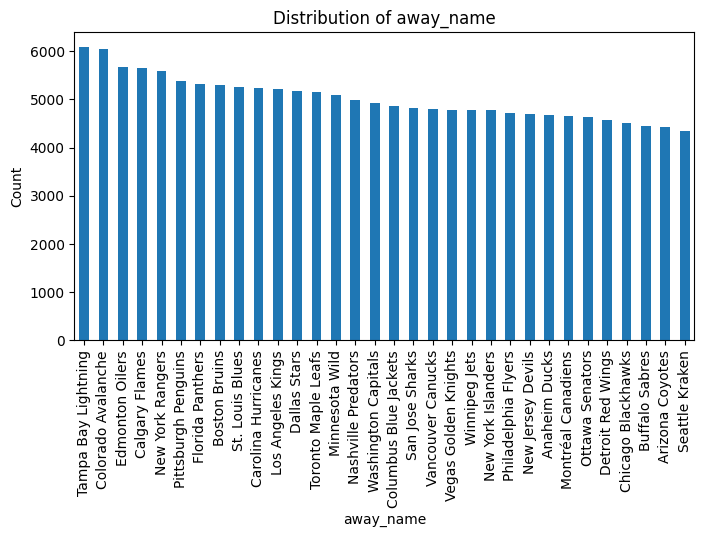

Exception ignored in: <function TransformNode.set_children.<locals>.<lambda> at 0x00000291484AE200>
Traceback (most recent call last):
  File "c:\Users\NURŞAH SATILMIŞ\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\transforms.py", line 209, in <lambda>
    self, lambda _, pop=child._parents.pop, k=id(self): pop(k))

KeyboardInterrupt: 


In [ ]:
# Loop through each categorical feature and plot its distribution
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    df[feature].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()
